# Начальные данные

Гамма-распределение используется для решения задач, где модельируется время до наступления события или длительность событий, состоящих из нескольких независимых шагов. Примеры задач, в которых используется гамма-распределение:



1.   Вычисление времени до отказа (системы). Гамма-распределение используется для описания времени до отказа систем, которые могут находиться в нескольких состояниях до выхода из строя. Например, если система состоит из нескольких компонентов, каждый из которых должен последовательно выйти из строя, прежде чем система полностью откажет, то это событие можно моделировать с использованием гамма-распределения.


2.   Медицинские исследования. В эпидемиологии гамма-распределение применяется для моделирования времени между событиями, например, времени до выздоровления пациента после лечения или времени до рецидива заболевания.
В нейробиологии гамма-распределение часто используется для описания распределения интервалов между спайками.
В бактериальной генной экспрессии число копий конститутивно экспрессируемого белка часто следует гамма-распределению, где масштаб и параметр формы являются, соответственно, средним числом всплесков за клеточный цикл и средним числом молекул белка, произведенных одной мРНК в течение ее жизни.


3.  Экономика. Гамма-распределение используется для моделирования временных интервалов между определёнными экономическими событиями, такими как время до получения прибыли или срок службы оборудования.


4. В беспроводной связи гамма-распределение используется для моделирования многолучевого затухания мощности сигнала


В математической статистике гамма-распределение часто встречаются бла­годаря тесной связи с нормальным распределением.


# Определение и свойства гамма-распределения

Гамма-распределение — распределение с плотностью вероятности, содержащей гамма-функцию.

Пусть распределение случайной величины X задаётся плотностью вероятности, имеющей вид

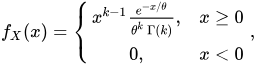

Тогда говорят, что случайная величина X имеет гамма-распределение с положительными параметрами θ и k. Пишут X ∼ Γ (k, θ).


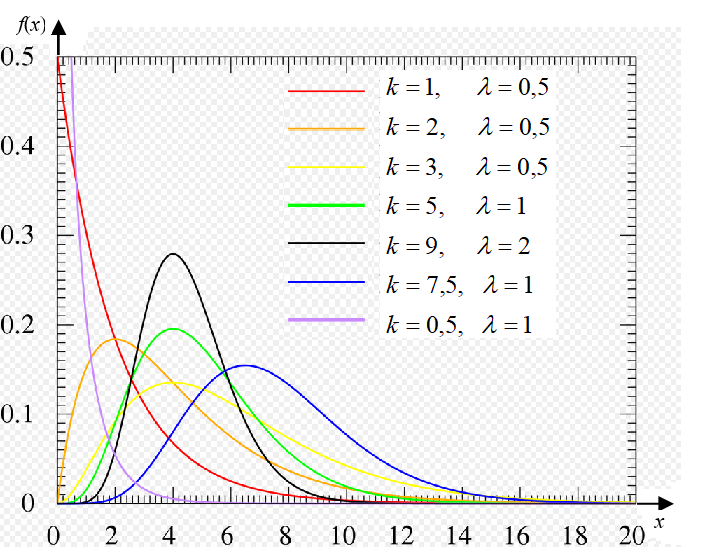

 При k=1 гамма-распределение становится экспоненциальным с интенсивностью λ.

При k=n/2 и λ=1/2 гамма-распределение становится распределением Хи-квадрат с n степенями свободы.

При k→∞ гамма-распределение асимптотически приближается к нормальному распределению N(k/λ;k/λ2).

Если параметр k принимает целое значение, то такое гамма-распределение также называется распределением Эрланга.

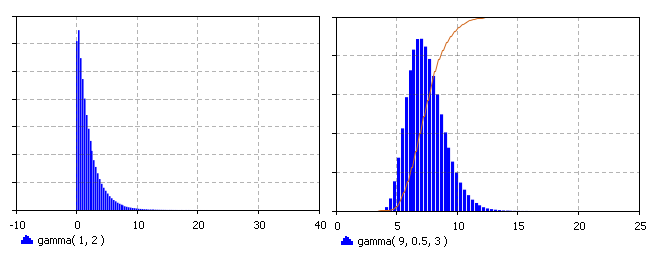

Гамма-распределение — это непрерывное распределение, ограниченное снизу. В некоторых случаях гамма-распределение сводится к экспоненциальному распределению: начинается с конечного значения при минимальном х и далее монотонно уменьшается. При k < 1 гамма-распределение стремится к бесконечности при минимальном х и при увеличении х монотонно уменьшается. При k > 1 гамма-распределение равно нулю при минимальном х, достигает максимума, зависящего от k и λ, после чего монотонно уменьшается. Если значения k только положительные, гамма-распределение сводится к распределению Эрланга.

При больших значениях k и при строго положительных значениях х гамма-распределение может также использоваться для аппроксимации нормального распределения.


# Постановка задачи
1. Сгенерировать из гамма-распределения выборку объёма 1000, построить гистограмму выборки и нарисовать поверх неё теоретическую плотность распределения случайной величины

2. Оценить распределение выборочного среднего случайной величины гамма-распределения при разных объёмах выборок.
При трёх и более значениях n (5, 10, 50, 100, 150, 300, 500, 700) сгенерировать 1000 выборок объёма n

3. Построить гистограммы распределений их выборочных средних

4. Поверх каждой гистограммы нарисовать плотность соответствующего нормального распределения

5. Посчитать значения параметров нормальных распределений, которыми приближается распределение выборочных средних

6. Оценить разницу между полученными распределениями при различных значениях n.


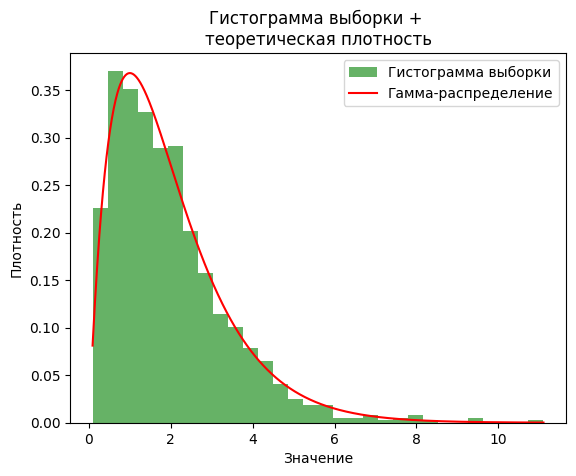

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import random
import math

shape_param = 2.0
scale_param = 1.0

def gamma_distribution(shape, scale=1.0, size=None): #функция для гамма-распределения

    def single_gamma(k, theta):

        if k < 1:
            k += 1
            uniform = random.uniform(0, 1)
            return single_gamma(k, theta) * uniform ** (1 / shape)

        d = k - 1 / 3
        c = 1 / math.sqrt(9 * d)

        while True:
            x = random.gauss(0, 1)
            v = (1 + c * x) ** 3

            if v > 0:
                u = random.uniform(0, 1)
                if u < 1 - 0.0331 * (x ** 4):
                    return d * v * theta
                if math.log(u) < 0.5 * x ** 2 + d * (1 - v + math.log(v)):
                    return d * v * theta

    if size is None:
        return single_gamma(shape, scale)
    else:
        return [single_gamma(shape, scale) for _ in range(size)]



def norm(x, mean=0.0, stddev=1.0): #функция для нормального распределения

    variance = stddev ** 2
    exponent = -((x - mean) ** 2) / (2 * variance)

    return (1 / (math.sqrt(2 * math.pi * variance))) * math.exp(exponent)

sample_size = 1000

#ПУНКТ 1 ЗАДАЧИ:

#генерация выборки
gamma_sample = gamma_distribution(shape_param, scale_param, sample_size)

# Построение гистограммы выборки
plt.hist(gamma_sample, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма выборки')

#построение теоретической плотности распределения случайной величины
x = np.linspace(min(gamma_sample), max(gamma_sample), 1000)
gamma_pdf = stats.gamma.pdf(x, shape_param, scale=scale_param)
plt.plot(x, gamma_pdf, 'r', label='Гамма-распределение')
plt.title('Гистограмма выборки + \nтеоретическая плотность')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()

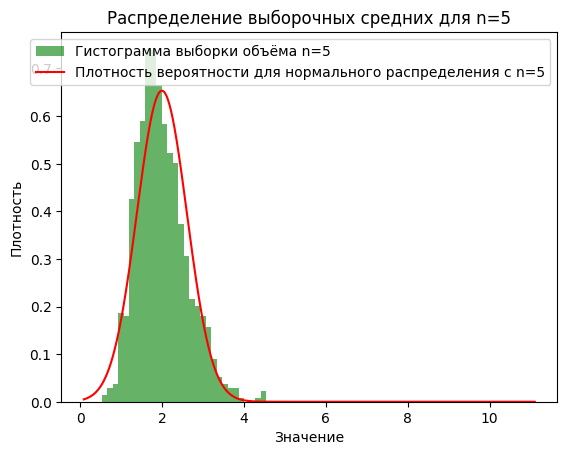

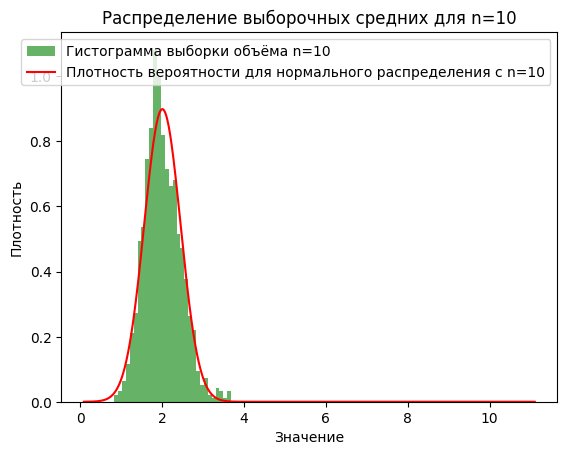

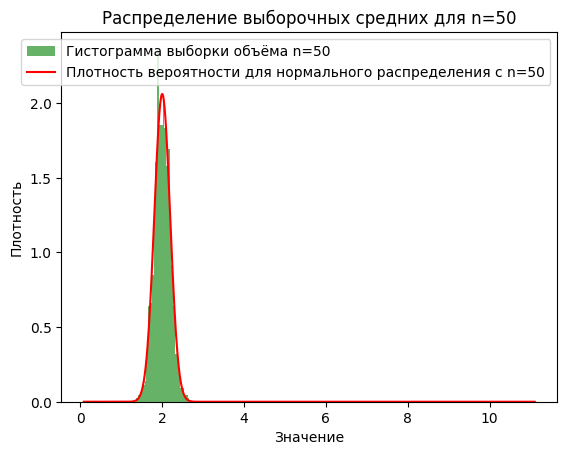

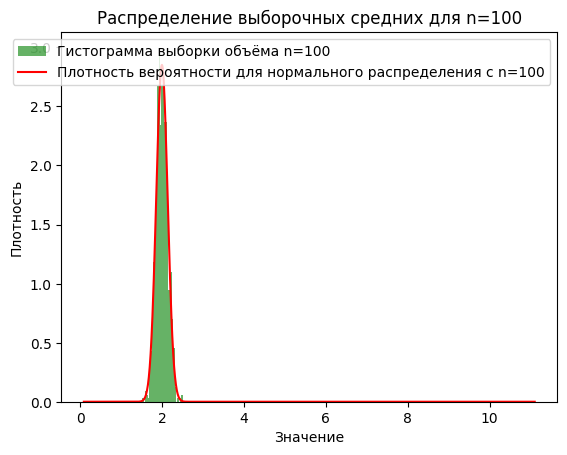

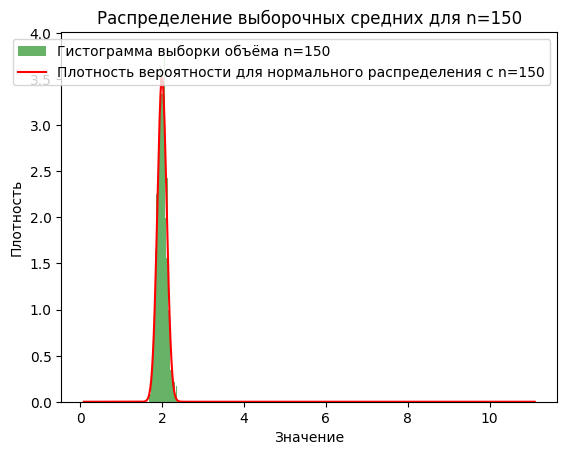

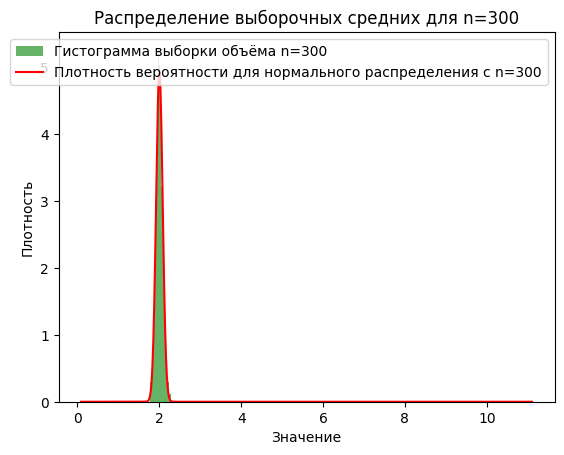

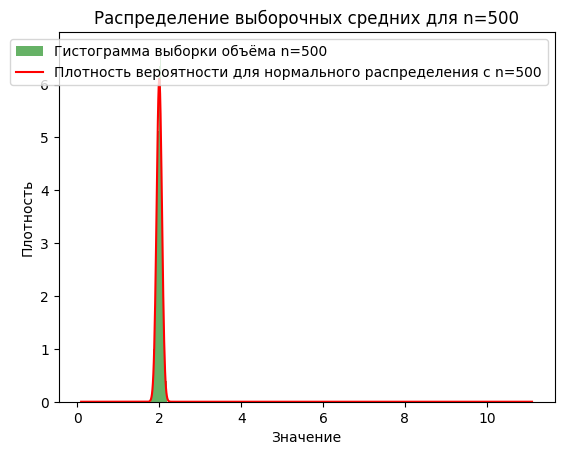

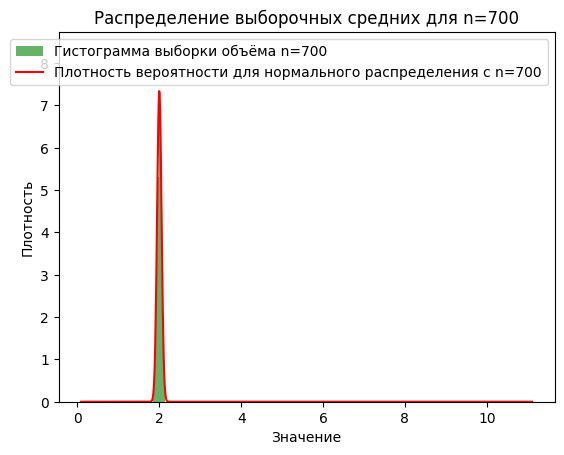

{5: (1.9959449002679384, 0.6106591141551453), 10: (2.0078658845836626, 0.4438615935152338), 50: (2.0037188270867277, 0.1935273893033863), 100: (1.9968676219801123, 0.13990093848334062), 150: (1.9988934779206575, 0.11353912553558729), 300: (2.00094894775445, 0.08065965901176923), 500: (1.998144808337564, 0.06526977005794508), 700: (1.9993263622075648, 0.054315286320231505)}


In [ ]:


n_values = [5, 10, 50, 100, 150, 300, 500, 700]
num_samples = 1000

#для хранения данных по выборочным средним
mean_distributions = {}

#ПУНКТ 2 ЗАДАЧИ:
#генерация выборок и расчет выборочных средних
for n in n_values:

    means = [np.mean(gamma_distribution(shape_param, scale_param, n)) for _ in range(num_samples)]
    mean_distributions[n] = means


#ПУНКТ 3 ЗАДАЧИ:
#построение гистограмм выборочных средних и нормальных распределений
for n in n_values:

    plt.hist(mean_distributions[n], bins=30, density=True, alpha=0.6, color='g', label=f'Гистограмма выборки объёма n={n}')
    means1 = np.mean(mean_distributions[n])
    std = np.std(mean_distributions[n], ddof=1)
    #ПУНКТ 4 ЗАДАЧИ:
    normal_dist = []
    for i in x:
        normal_dist.append (norm(i, means1, std))
    plt.plot(x, normal_dist, 'r', label=f'Плотность вероятности для нормального распределения с n={n}')

    plt.title(f'Распределение выборочных средних для n={n}')
    plt.xlabel('Значение')
    plt.ylabel('Плотность')
    plt.legend()
    plt.show()


In [ ]:
#ПУНКТЫ 5 И 6
#вывод параметров нормального распределния
parametry = {n: (np.mean(mean_distributions[n]), np.std(mean_distributions[n], ddof=1)) for n in n_values}
parametry_df = pd.DataFrame(parametry, index=['Среднее', 'Стандартное отклонение']).T
print(parametry_df)

      Среднее  Стандартное отклонение
5    1.995945                0.610659
10   2.007866                0.443862
50   2.003719                0.193527
100  1.996868                0.139901
150  1.998893                0.113539
300  2.000949                0.080660
500  1.998145                0.065270
700  1.999326                0.054315


# Результат и выводы

В результате приведённых выше вычислений, смотря на полученные графики, мы можем убедиться в том, что при больших k гамма-распределение может быть приближено нормальным распределением. При маленьких же значениях k имеются значительные расхождения между гамма-распределением и нормальным распределением.

# Список литературы

https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

https://cyclowiki.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

https://cyclowiki.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F

https://bigenc.ru/c/gamma-raspredelenie-c355ff

https://anylogic.help/ru/advanced/functions/gamma.html

https://math.fandom.com/ru/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5